In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('players_21.csv')

In [4]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [5]:
#find numeric and non-numeric columns

numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall',
       'potential', 'value_eur', 'wage_eur', 'international_reputation',
       'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'menta

In [6]:
#finding non-numeric-values

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(numeric_cols)

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'league_rank', 'overall',
       'potential', 'value_eur', 'wage_eur', 'international_reputation',
       'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'menta

#finding Missing data

In [7]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_url        18944 non-null  object
 1   short_name        18944 non-null  object
 2   long_name         18944 non-null  object
 3   dob               18944 non-null  object
 4   nationality       18944 non-null  object
 5   club_name         18719 non-null  object
 6   league_name       18719 non-null  object
 7   player_positions  18944 non-null  object
 8   preferred_foot    18944 non-null  object
 9   work_rate         18944 non-null  object
 10  body_type         18944 non-null  object
 11  real_face         18944 non-null  object
 12  player_tags       1408 non-null   object
 13  team_position     18719 non-null  object
 14  loaned_from       758 non-null    object
 15  joined            17961 non-null  object
 16  nation_position   1127 non-null   object
 17  player_trait

In [8]:
#use isna().sum()
num_missing = df.isna().sum()
num_missing[:20]

sofifa_id                     0
player_url                    0
short_name                    0
long_name                     0
age                           0
dob                           0
height_cm                     0
weight_kg                     0
nationality                   0
club_name                   225
league_name                 225
league_rank                 225
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
player_positions              0
preferred_foot                0
international_reputation      0
weak_foot                     0
dtype: int64

In [9]:
#find missing percentage

pct_missing = df.isna().mean()
pct_missing[:20]

sofifa_id                   0.000000
player_url                  0.000000
short_name                  0.000000
long_name                   0.000000
age                         0.000000
dob                         0.000000
height_cm                   0.000000
weight_kg                   0.000000
nationality                 0.000000
club_name                   0.011877
league_name                 0.011877
league_rank                 0.011877
overall                     0.000000
potential                   0.000000
value_eur                   0.000000
wage_eur                    0.000000
player_positions            0.000000
preferred_foot              0.000000
international_reputation    0.000000
weak_foot                   0.000000
dtype: float64

Method #2: missing data (by columns) heatmap

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df.cols.isna(), cmap=sns.color_palette(colours)) >

SyntaxError: invalid syntax (1630924594.py, line 8)

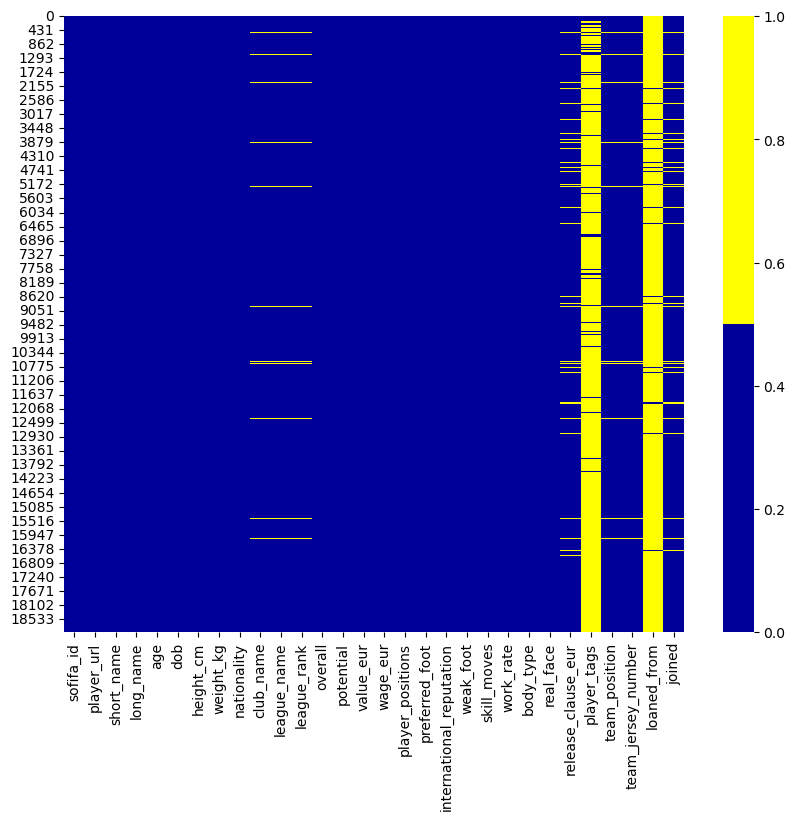

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00']  # specify colours: yellow - missing, blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

plt.show()

Method #3: missing data (by rows) histogram

<Axes: >

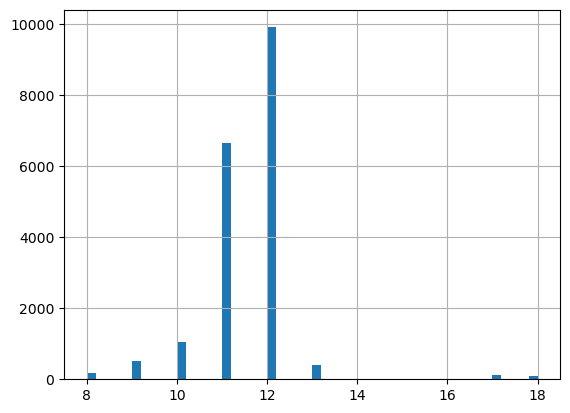

In [13]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

 What are the columns with over 30% missing data?

In [14]:
pct_missing[pct_missing > .3]

player_tags             0.925676
loaned_from             0.959987
nation_position         0.940509
nation_jersey_number    0.940509
gk_diving               0.890044
gk_handling             0.890044
gk_kicking              0.890044
gk_reflexes             0.890044
gk_speed                0.890044
gk_positioning          0.890044
player_traits           0.561075
defending_marking       1.000000
dtype: float64

In [20]:
df_less_missing_cols =  df.drop(columns=pct_missing[pct_missing > .3].index)
df_less_missing_cols.shape

(18944, 94)

In [15]:
df_less_missing_cols = df.loc[:, pct_missing <= .3].copy() # equivalent to df.drop(columns=pct_missing[pct_missing > .3].index)
df_less_missing_cols.shape

(18944, 94)

Technique #2: drop rows / observations

In [16]:
df_less_missing_rows = df[missing_by_row < 35].copy()
df_less_missing_rows.shape 

(18944, 106)

Technique #3: impute the missing with constant values

In [21]:
df_copy = df.copy()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(-999)
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna('_MISSING_')

Technique #4: impute the missing with statistics

In [23]:
df_copy = df.copy()
med = df_copy[numeric_cols].median()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)

We can also impute the non-numeric columns with their most frequent values.

most_freq = df_copy[non_numeric_cols].describe().loc['top']
most_freq

In [25]:
most_freq = df_copy[non_numeric_cols].describe().loc['top'] 
most_freq

player_url          https://sofifa.com/player/158023/lionel-messi/...
short_name                                               J. Rodríguez
long_name                                                  Liam Kelly
dob                                                        1992-02-29
nationality                                                   England
club_name                                                FC Barcelona
league_name                               English League Championship
player_positions                                                   CB
preferred_foot                                                  Right
work_rate                                               Medium/Medium
body_type                                                      Normal
real_face                                                          No
player_tags                                                 #Strength
team_position                                                     SUB
loaned_from         

Then we can use it to fill in the missing.

In [26]:
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna(most_freq)

Irregular data (outliers)

In [28]:
df.kurt(numeric_only=True)[:30]

sofifa_id                    6.164631
age                         -0.415689
height_cm                   -0.345059
weight_kg                    0.076536
league_rank                  3.901022
overall                     -0.002538
potential                    0.092657
value_eur                   68.855929
wage_eur                    96.591958
international_reputation    24.559540
weak_foot                    0.601850
skill_moves                 -0.067779
release_clause_eur          65.631670
team_jersey_number           5.806810
contract_valid_until        -0.529196
nation_jersey_number        -1.185122
pace                         0.650155
shooting                    -0.773094
passing                     -0.135628
dribbling                    0.366572
defending                   -1.043307
physic                      -0.156288
gk_diving                   -0.109797
gk_handling                  0.074800
gk_kicking                   0.402699
gk_reflexes                 -0.182043
gk_speed    

In [29]:
df['wage_eur'].describe()

count     18944.000000
mean       8675.852513
std       19654.774894
min           0.000000
25%        1000.000000
50%        3000.000000
75%        7000.000000
max      560000.000000
Name: wage_eur, dtype: float64

In [30]:
df['value_eur'].describe()

count    1.894400e+04
mean     2.224813e+06
std      5.102486e+06
min      0.000000e+00
25%      3.000000e+05
50%      6.500000e+05
75%      1.800000e+06
max      1.055000e+08
Name: value_eur, dtype: float64

kurt value of wage_eur  is higher, lets dig deeper for that varibale

Method #2: histogram & box plot

<Axes: >

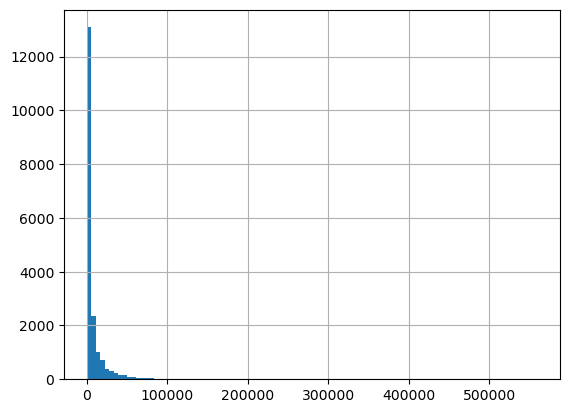

In [31]:
df['wage_eur'].hist(bins = 100)

<Axes: >

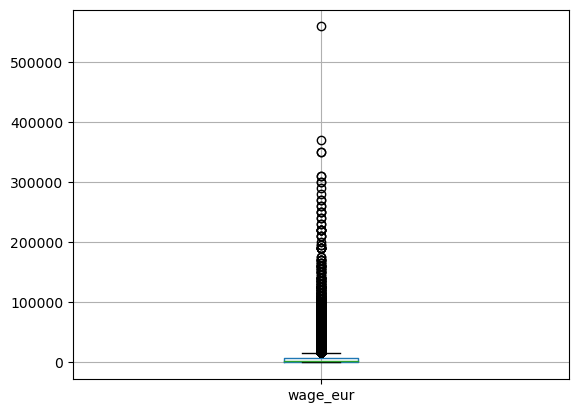

In [32]:
df.boxplot(column=['wage_eur'])

#we could see that there is a value above 500000,which could be an outlier

Method #3: bar chart

for non numeric columns 

<Axes: >

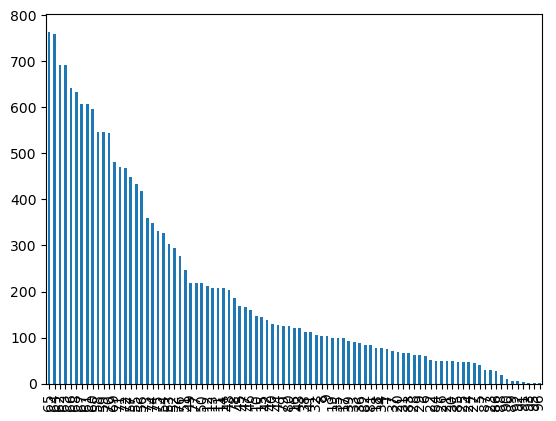

In [35]:
df['skill_dribbling'].value_counts().plot(kind='bar')

Unnecessary data
Unnecessary type #1: repetitive & uninformative

We can generate a list of columns with a high percentage of the same value. For example, we specify below to show columns with over 99.9% rows being the same value.

In [55]:
do = df['skill_dribbling'].value_counts()
print(do)

65    765
64    760
62    693
63    692
66    642
     ... 
92      6
91      3
93      1
95      1
96      1
Name: skill_dribbling, Length: 91, dtype: int64


In [36]:
num_rows = len(df)

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

defending_marking: 100.00%
NaN    18944
Name: defending_marking, dtype: int64



In [58]:
 df['defending_marking'].value_counts()

Series([], Name: defending_marking, dtype: int64)

In [57]:
distinct_values = df['defending_marking'].unique()
print(distinct_values)

[nan]


In [51]:
df['defending_marking']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
18939   NaN
18940   NaN
18941   NaN
18942   NaN
18943   NaN
Name: defending_marking, Length: 18944, dtype: float64

Unnecessary type #3: duplicates

In [59]:
df[df.duplicated()]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [60]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=106)

#we first delet id column and lets see how many duplicate rows are there

In [61]:
df[df.drop(columns=['sofifa_id']).duplicated()]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [62]:
df_dedupped = df.drop(columns=['sofifa_id']).drop_duplicates()

print(df.shape)
print(df_dedupped.shape)

(18944, 106)
(18944, 105)


Inconsistent data

In [64]:
df['nationality'].value_counts()

England             1685
Germany             1189
Spain               1072
France               984
Argentina            936
                    ... 
Saint Lucia            1
Papua New Guinea       1
Aruba                  1
Chad                   1
Nicaragua              1
Name: nationality, Length: 162, dtype: int64

We are lucky that the text in this column looks standardized. But there could be inconsistent capitalizations

To avoid this, we can lowercase (or uppercase) all letters.

In [66]:
df['nationality'] = df['nationality'].str.lower()
df['nationality'].value_counts(dropna=False)

england             1685
germany             1189
spain               1072
france               984
argentina            936
                    ... 
saint lucia            1
papua new guinea       1
aruba                  1
chad                   1
nicaragua              1
Name: nationality, Length: 162, dtype: int64

Inconsistent type #2: data types

In [68]:
df.columns[:35]

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting'],
      dtype='object')

In [69]:
df['timestamp']

KeyError: 'timestamp'

In [73]:
df1=df.columns[]
df[df1=='time']

SyntaxError: invalid syntax (3598775887.py, line 1)

In [74]:
df.dtypes.value_counts()

int64      44
object     44
float64    18
dtype: int64

In [75]:
time_related_columns = df.filter(regex='time', axis=1)
print(time_related_columns)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[18944 rows x 0 columns]


In [76]:
df.columns[:40]

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name', 'league_name',
       'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur',
       'player_positions', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving'],
      dtype='object')

In [78]:
df['dob'].describe()

count          18944
unique          6236
top       1992-02-29
freq             128
Name: dob, dtype: object

In [79]:
df['dob']

0        1987-06-24
1        1985-02-05
2        1993-01-07
3        1988-08-21
4        1992-02-05
            ...    
18939    1996-04-13
18940    1999-04-26
18941    2000-06-28
18942    1997-02-20
18943    1991-11-20
Name: dob, Length: 18944, dtype: object

What to do?
We can convert the column to a DateTime format and even extract the specific year, month, weekday, etc

In [80]:
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')
df['year'] = df['dob'].dt.year
df['month'] = df['dob'].dt.month
df['weekday'] = df['dob'].dt.weekday


In [81]:
df[['dob', 'year', 'month', 'weekday']].head()

,dob,year,month,weekday
0,1987-06-24,1987,6,2
1,1985-02-05,1985,2,1
2,1993-01-07,1993,1,3
3,1988-08-21,1988,8,6
4,1992-02-05,1992,2,2


Inconsistent type #3: typos of categorical values

Inconsistent type #4: addresses

In [82]:
df_add_ex = pd.DataFrame(['123 MAIN St Apartment 15', '123 Main Street Apt 12   ', '543 FirSt Av', '  876 FIRst Ave.'], columns=['address'])
df_add_ex

,address
0,123 MAIN St Apartment 15
1,123 Main Street Apt 12
2,543 FirSt Av
3,876 FIRst Ave.


We can run the below code to:

lowercase the letters
remove leading and trailing white spaces
delete periods
standardize wordings

We are using regular expressions to specify search patterns. You can learn more about it

In [83]:

df_add_ex['address_std'] = df_add_ex['address'].str.lower()
df_add_ex['address_std'] = df_add_ex['address_std'].str.strip() # remove leading and trailing whitespaces.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\.', '', regex=True) # remove period.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bstreet\\b', 'st', regex=True) # replace street with st.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bapartment\\b', 'apt', regex=True) # replace apartment with apt.
df_add_ex['address_std'] = df_add_ex['address_std'].str.replace('\\bav\\b', 'ave', regex=True) # replace av with ave.

df_add_ex

,address,address_std
0,123 MAIN St Apartment 15,123 main st apt 15
1,123 Main Street Apt 12,123 main st apt 12
2,543 FirSt Av,543 first ave
3,876 FIRst Ave.,876 first ave
